In [2]:
import xarray as xr
import numpy as np
import glob
import os

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import cartopy
cartopy.config['pre_existing_data_dir']  = '/home/ad/alberta/git/cartopy_data' 


In [3]:
latminN=30
latmaxN=40
lonminN=-55
lonmaxN=-40


In [4]:
latminM=35.1
latmaxM=44.4
lonminM=-5.7
lonmaxM=9.6


In [5]:
colors=['turquoise','royalblue','palegreen','seagreen']
phase=['calval','calval','science','science']
data=['karin','nadir','karin','nadir']

/work/ALT/odatis/eNATL60/alberta/SWOT-sim/eNATL60-BLB002/MEDWEST/calval_phase/karin


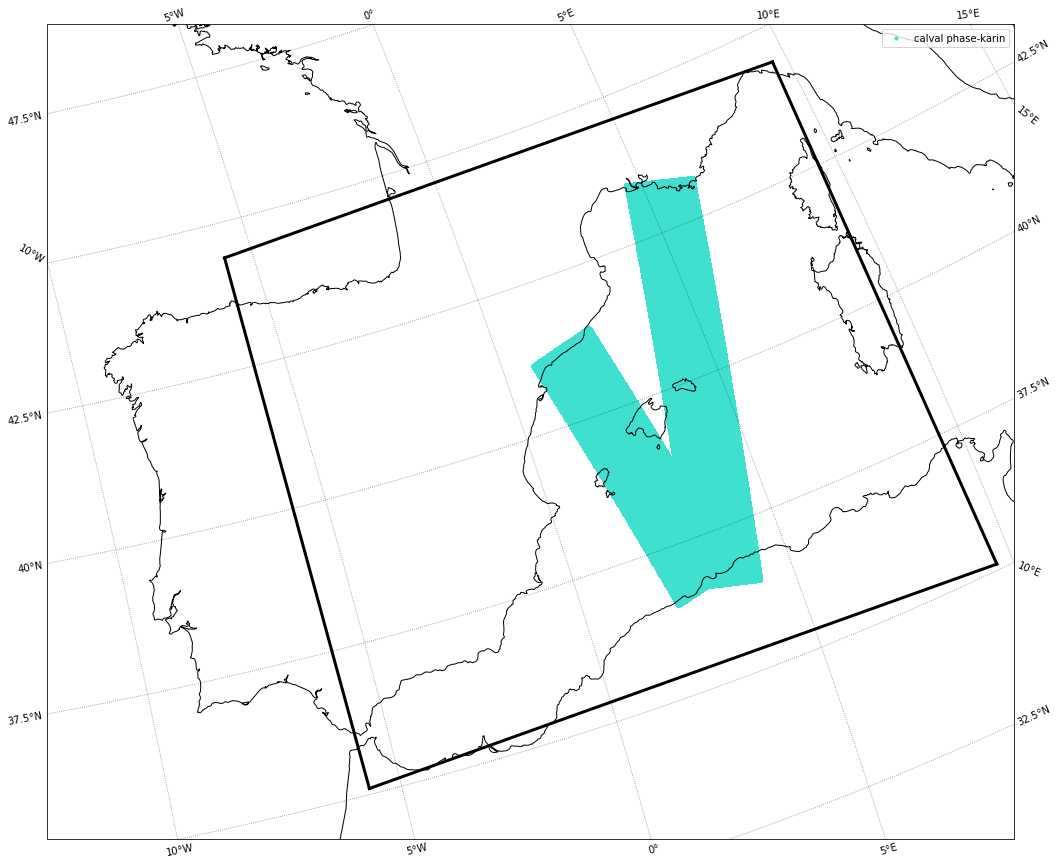

In [6]:
dir='/work/ALT/odatis/eNATL60/alberta/SWOT-sim/eNATL60-BLB002/'

region='MEDWEST'
tdir=dir+region+'/'

fig=plt.figure(figsize=(20,15))
#ax = plt.subplot(111,projection=ccrs.PlateCarree(central_longitude=0))
ax = fig.add_subplot(111,projection=ccrs.Orthographic(central_longitude=-30,
                                                        central_latitude=35))
ax.set_extent((-10, 10, 35, 45))
ax.coastlines(resolution="10m")
gl = ax.gridlines(draw_labels=True, linestyle=':', color='black',
                          alpha=0.5)
#gl.top_labels = False
#gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax.tick_params('both',labelsize=22)

ax.plot([lonminM, lonminM], [latminM, latmaxM],color='black',linewidth=3,transform=ccrs.PlateCarree())
ax.plot([lonmaxM, lonmaxM], [latminM, latmaxM],color='black',linewidth=3,transform=ccrs.PlateCarree())
ax.plot([lonminM, lonmaxM], [latminM, latminM],color='black',linewidth=3,transform=ccrs.PlateCarree())
ax.plot([lonminM, lonmaxM], [latmaxM, latmaxM],color='black',linewidth=3,transform=ccrs.PlateCarree())    

k=0

tdirf=tdir+phase[k]+'_phase/'+data[k]
files=glob.glob(tdirf+'/*nc')
print(tdirf)
lat_all=[]
lon_all=[]
for f in np.arange(len(files)):
    ds=xr.open_dataset(files[f])
    lat = ds['latitude'].values;
    lon = ds['longitude'].values;
    lonb=xr.where(lon>180,lon-360,lon)
    lat_all.append(lat)
    lon_all.append(lonb)
plt.scatter(np.concatenate(lon_all,axis=None),np.concatenate(lat_all,axis=None), c=colors[k],label=phase[k]+' phase-'+data[k], linewidth=0, s=18,transform=ccrs.PlateCarree(),zorder=1);
ax.legend()

In [7]:
k=0

tdirf=tdir+phase[k]+'_phase/'+data[k]
files=glob.glob(tdirf+'/*nc')
print(tdirf)
lat_all=[]
lon_all=[]
for f in np.arange(len(files)):
    ds=xr.open_dataset(files[f])
    lat = ds['latitude'].values;
    lon = ds['longitude'].values;
    lonb=xr.where(lon>180,lon-360,lon)
    lat_all.append(lat)
    lon_all.append(lonb)


/work/ALT/odatis/eNATL60/alberta/SWOT-sim/eNATL60-BLB002/MEDWEST/calval_phase/karin


In [8]:
len(np.concatenate(lat_all,axis=None))

18451622